In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the file loan.csv
loan=pd.read_csv(r'loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# As the columns after 25 is likely to be very less important so instead of dropping them chossing the necessary columns.
loan_df=loan.iloc[:,1:25]

In [5]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94


In [6]:
#dropping more columns as they don't play an important role in deciding the sanctioning of the loan.
loan_df.drop(labels=['pymnt_plan','zip_code','desc','member_id','url','funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [7]:
# Here created a new file loan_df which has cleaned data. It can be done by giving the address of he destination folder.
loan_df.to_csv(r'loan_df.xlsx')

#                                     Data Cleaning

In [8]:
round(100*(loan_df.isnull().sum())/len(loan_df.index))

loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              6.0
emp_length             3.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [9]:
# Droping the rows having loan_status as Current
loan_df.drop(loan_df.loc[loan_df['loan_status']=='Current'].index, inplace=True)
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33
39713,8500,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40
39714,5000,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30
39715,5000,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72


In [10]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
round(100*(loan_df.isnull().sum())/len(loan_df.index))

loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              6.0
emp_length             3.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_title            36191 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  title                38566 non-null  object 
 15  addr_state           38577 non-null 

In [13]:
loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
#Code to the notnull values in the column of emp_length and emp_title
loan_df2=loan_df[(loan_df['emp_length'].notnull()) & (loan_df['emp_title'].notnull())]
loan_df2

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51
7,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,36 months,7.43%,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,credit_card,My Credit Card Loan,WI,0.31
39711,5000,36 months,8.70%,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,Reduce Credit Card Debt,CO,15.55
39712,2500,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33
39713,8500,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40


In [15]:
round(100*(loan_df2.isnull().sum())/len(loan_df2.index))

loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [16]:
# Converting the datatype of column term(object to int64).
loan_df2['term'] = loan_df2['term'].apply(lambda x:x.split()[0])

In [17]:
loan_df2['term']=pd.to_numeric(loan_df2['term'])
loan_df2.term.unique()

array([60, 36], dtype=int64)

In [18]:
loan_df2.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [19]:
#mapping length of employee of a loan into int value(years).
loan_df2['emp_length']=loan_df2['emp_length'].map({'< 1 year':.5,'10+ years':10,'3 years':3, '8 years':8, '9 years':9,'5 years':5, '4 years':4, '1 year':1, '6 years':6, '2 years':2, '7 years':7})

In [20]:
loan_df2.emp_length.unique()

array([ 0.5, 10. ,  3. ,  8. ,  9. ,  5. ,  4. ,  1. ,  6. ,  2. ,  7. ])

In [21]:
#Extracting the month of issuing of a loan.
loan_df2['issue_month'] = loan_df2['issue_d'].apply(lambda x:x.split('-')[0])

In [22]:
#Extracting the year of issuing of a loan.
loan_df2['issue_year'] = loan_df2['issue_d'].apply(lambda x:x.split('-')[1])
loan_df2.drop(labels=['issue_d'],axis=1,inplace=True)
loan_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,issue_month,issue_year
1,2500,60,15.27%,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,Dec,11
3,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,Dec,11
5,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,Dec,11
6,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,NC,23.51,Dec,11
7,3000,36,18.64%,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Fully Paid,car,Car Downpayment,CA,5.35,Dec,11


In [23]:
loan_df2['issue_year'].describe()

count     36136
unique        5
top          11
freq      19131
Name: issue_year, dtype: object

In [24]:
loan_df2['issue_year']=loan_df2['issue_year'].astype(int)

In [25]:
loan_df2['issue_year'].describe()

count    36136.000000
mean        10.304821
std          0.883992
min          7.000000
25%         10.000000
50%         11.000000
75%         11.000000
max         11.000000
Name: issue_year, dtype: float64

# Exploratory Data Analysis

#### Which term(36 or 60) is more opted by the people for getting a loan.

[Text(0, 0.5, 'Total No Of Loans Issued'), Text(0.5, 0, 'Term of a loan')]

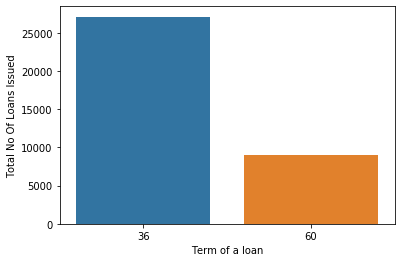

In [26]:
s=sb.countplot(x='term',data=loan_df2)
s.set(xlabel='Term of a loan',ylabel='Total No Of Loans Issued')

This shows that more people go for loan having 36 months of term or tenure.

#### finding the month in which max loans have been issued

[Text(0, 0.5, 'Total No Of Loans Issued'), Text(0.5, 0, 'Issuing Loan Month')]

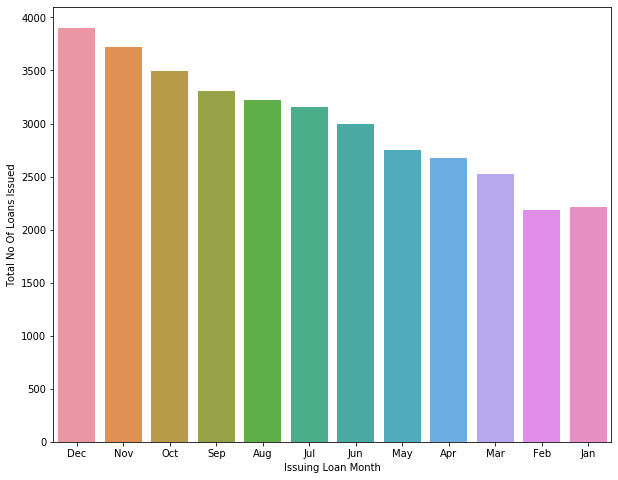

In [27]:
plt.figure(figsize=(10,8))
s=sb.countplot(x='issue_month',data=loan_df2)
s.set(xlabel='Issuing Loan Month',ylabel='Total No Of Loans Issued')
#lineplot

By this it can be seen that the maximum loan has been sanctioned in the month of December.

#### finding the year in which max loans have been issued

[Text(0, 0.5, 'Total No Of Loans Issued'), Text(0.5, 0, 'Issuing Loan Year')]

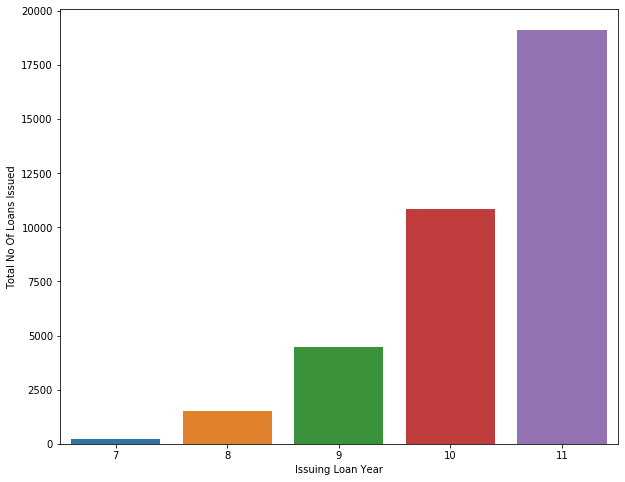

In [28]:
# Max number of investments in year
plt.figure(figsize=(10,8))
p=sb.countplot(x='issue_year',data=loan_df2)
p.set(xlabel='Issuing Loan Year',ylabel='Total No Of Loans Issued')

Here we can see that there's a sudden increase in the sanction of loan from the year 2010 to 2011.

#### The purpose for which loans have been issued max

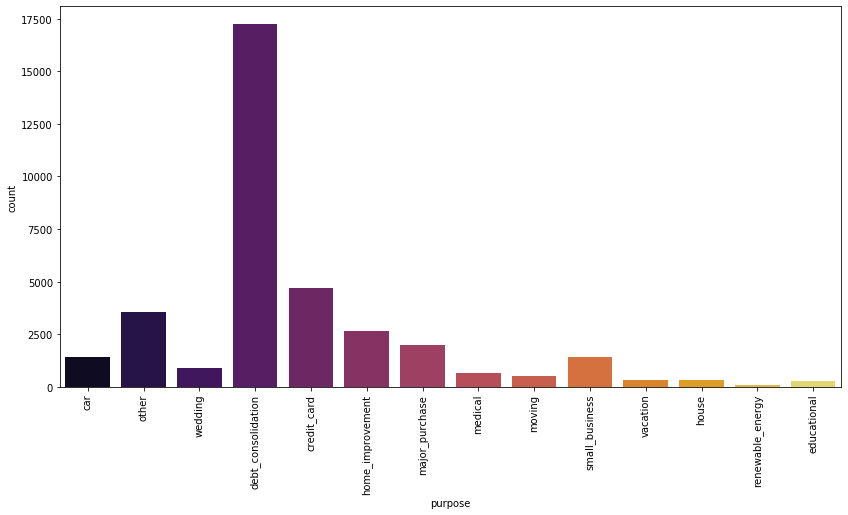

In [29]:
# Loan purpose
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
sb.countplot(x='purpose',data=loan_df2,palette='inferno')

This shows that the maximum loans have been issued for debt consolidation

#### Division of People according to Grade

[Text(0, 0.5, 'Loan'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Quantity of people according to Grade')]

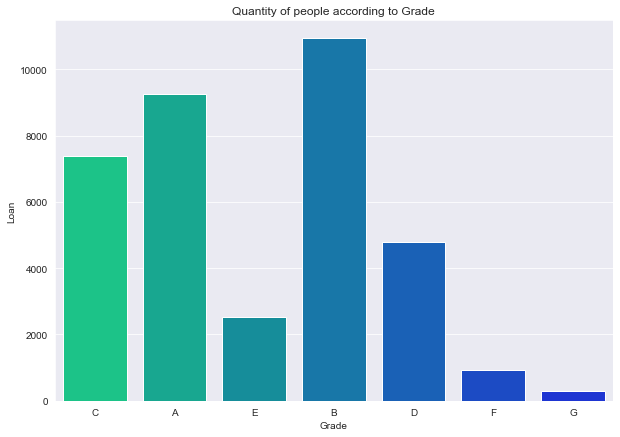

In [55]:
plt.figure(figsize=(10,7))
z=sb.countplot(x='grade',data=loan_df2,palette='winter_r')
z.set(xlabel='Grade',ylabel='Loan',title='Quantity of people according to Grade')

Maximum people that takes loan is from B grade.

#### Which grade is best suitable for sanctioning of a loan.

In [31]:
d1=loan_df2.groupby(by='grade')['emp_length'].count().sort_values(ascending=False)
d1

grade
B    10932
A     9269
C     7389
D     4803
E     2533
F      922
G      288
Name: emp_length, dtype: int64

[Text(0, 0.5, 'Total number of loans sanctiones'),
 Text(0.5, 0, 'grades'),
 Text(0.5, 1.0, 'Loan distribution according to Grade of the loanee')]

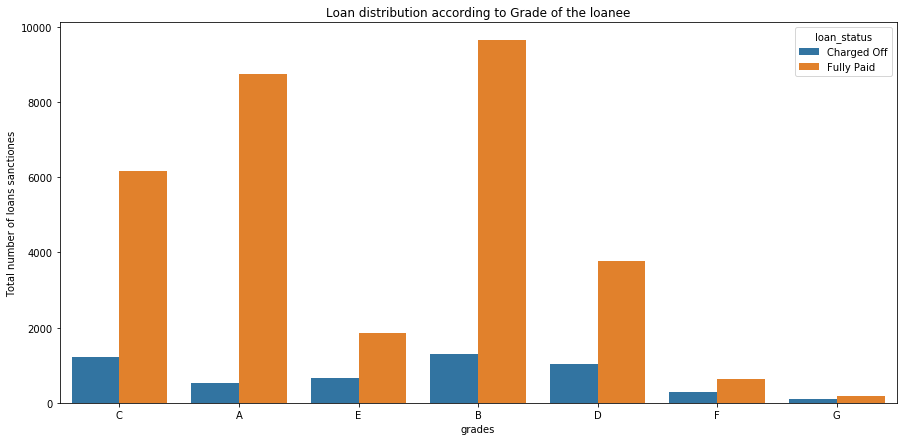

In [32]:
plt.figure(figsize=(15,7))
w=sb.countplot(x='grade',hue='loan_status',data=loan_df2)
w.set(xlabel='grades',ylabel='Total number of loans sanctiones',title='Loan distribution according to Grade of the loanee')

From the above graph we can see that whether the loanee has fully paid the loan or not. And from this we can't say that the best grade of a loanee group is B because it has a higher number of loanee that has Charged off. 
Comparatively, the A grade loanee can be considered as the most appropriate group that the company has to focus because the ratio of Charged off to Fully Paid is somewhat optimal.

#### Relationship between grade and sub_grade

In [33]:
loan_curr=loan_df2[['grade','sub_grade']]
loan_curr=loan_df2.corr().round(2)
loan_curr

,loan_amnt,term,installment,emp_length,annual_inc,dti,issue_year
loan_amnt,1.00,0.35,0.93,0.14,0.26,0.06,0.11
term,0.35,1.00,0.09,0.10,0.04,0.08,0.24
installment,0.93,0.09,1.00,0.12,0.25,0.05,0.06
emp_length,0.14,0.10,0.12,1.00,0.11,0.05,0.10
annual_inc,0.26,0.04,0.25,0.11,1.00,-0.12,0.01
dti,0.06,0.08,0.05,0.05,-0.12,1.00,0.09
issue_year,0.11,0.24,0.06,0.10,0.01,0.09,1.00


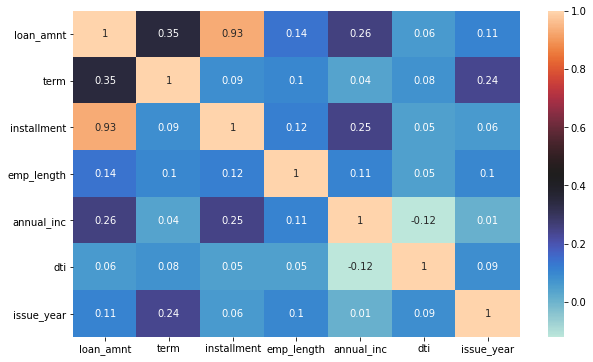

In [34]:
plt.figure(figsize=(10,6))
sb.heatmap(loan_curr,annot=True,cmap='icefire')

By this heatmap, we got to know that installment is highly correlated to loan_amount, which means that the higher the loan_amount higher will be the installment a loanee has to pay.

#### Relationship that shows the for how long a loan is likely to be sanctioned.

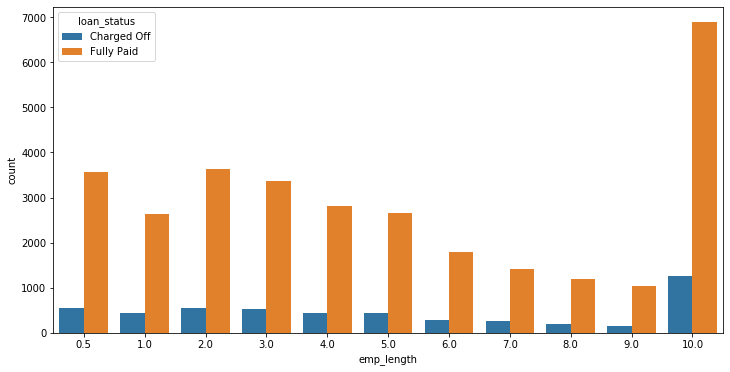

In [35]:
plt.figure(figsize=(12,6))
sb.countplot(x='emp_length',hue='loan_status',data=loan_df2)

From this, we analyse that the maximum people opt for a loan of tensure more than 10 years. But due to certain reasons, they are also unable to pay them off. 
So, from this we conclude that the best category of loan is of 10years. Also of this year there is least amount of people that has Charged off.

#### Reason that why 10year loans should be think twice before sanctioning.

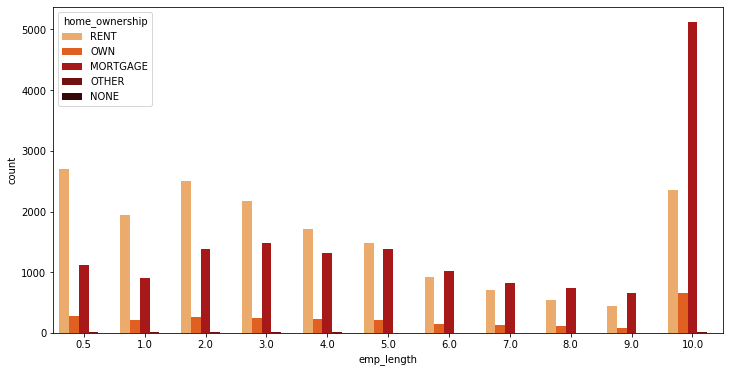

In [36]:
plt.figure(figsize=(12,6))
sb.countplot(x='emp_length',hue='home_ownership',data=loan_df2,palette='gist_heat_r')


We can say that one of the reason that the 10year of loan should not be permitted to the loanee is because of the exponential increase of Mortgage by which it has high risk of Charged Off.

#### Distribution Of Loan Amount

[Text(0.5, 0, 'Loan Amount'), Text(0.5, 1.0, 'Distribution of loan amount')]

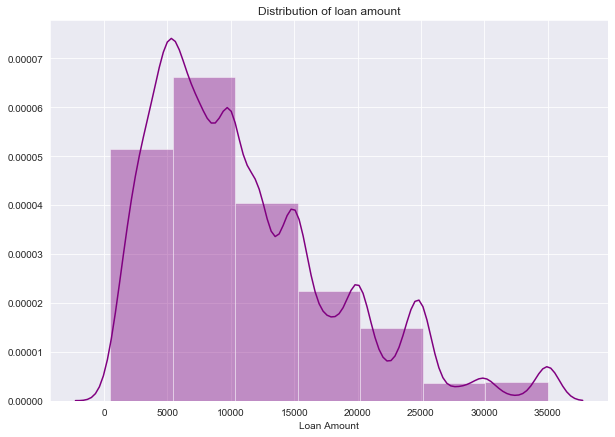

In [37]:
plt.figure(figsize=(10,7))
sb.set_style(style='darkgrid')
p=sb.distplot(loan_df['loan_amnt'],bins=7,color='purple')
p.set(xlabel='Loan Amount',title='Distribution of loan amount')

By this we can say that the maximum loan amount ranges around 5000 to 10000.

# Defaulter Loanees
### Analysis of People that are more likely to be defaulters.

In [38]:
defaulter=loan_df2[loan_df2['loan_status']=='Charged Off']
defaulter.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,issue_month,issue_year
1,2500,60,15.27%,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,Dec,11
9,5375,60,12.69%,121.45,B,B5,Starbucks,0.5,RENT,15000.0,Verified,Charged Off,other,Building my credit history.,TX,18.08,Dec,11
12,9000,36,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,0.5,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,freedom,VA,10.08,Dec,11
14,10000,36,10.65%,325.74,B,B2,SFMTA,3.0,RENT,100000.0,Source Verified,Charged Off,other,Other Loan,CA,7.06,Dec,11
21,21000,36,12.42%,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,Charged Off,debt_consolidation,Debt Cleanup,FL,13.22,Dec,11


#### Which grade has maximum defaulters

In [39]:
defaulter_perc=pd.DataFrame(data=(100*defaulter['grade'].value_counts())/loan_df['grade'].value_counts())
defaulter_perc

,grade
A,5.216526
B,11.074946
C,15.649732
D,20.196657
E,25.159594
F,30.122951
G,32.441472


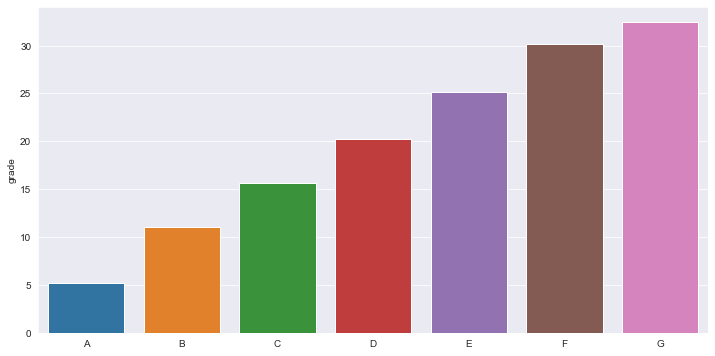

In [40]:
plt.figure(figsize=(12,6))
#sb.countplot(x='grade',data=defaulter_perc)
sb.barplot(x=defaulter_perc.index,y='grade',data=defaulter_perc)

This shows that G grade has maximum number of defaulters.

#### Analysis Of defaulters according to purpose

In [41]:
purpose_df=pd.DataFrame(data=round((100*defaulter['purpose'].value_counts())/loan_df2['purpose'].value_counts(),2))
purpose_df.sort_values(by='purpose',ascending=False,inplace=True)
purpose_df

,purpose
small_business,26.88
renewable_energy,18.18
educational,16.72
house,16.32
other,15.96
moving,15.36
medical,15.32
debt_consolidation,15.04
vacation,14.50
home_improvement,11.63


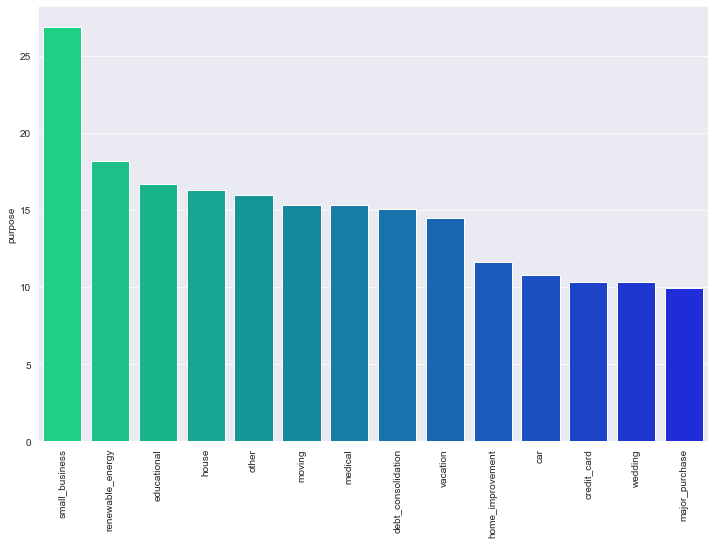

In [58]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sb.barplot(x=purpose_df.index,y='purpose',data=purpose_df,ci=False,palette='winter_r')

The people who take a loan for small businesses are more prone to be a defaulter.

#### Which Year has maximum maximum risk in sanctioning of loan and which are the best.

In [43]:
emp_default=pd.DataFrame(data=round((100*defaulter['emp_length'].value_counts())/loan_df2['emp_length'].value_counts(),2))
emp_default.sort_values(by='emp_length',ascending=False,inplace=True)
emp_default

,emp_length
10.0,15.57
7.0,15.27
8.0,14.23
1.0,14.18
5.0,14.11
6.0,14.10
3.0,13.69
4.0,13.69
0.5,13.62
2.0,13.09


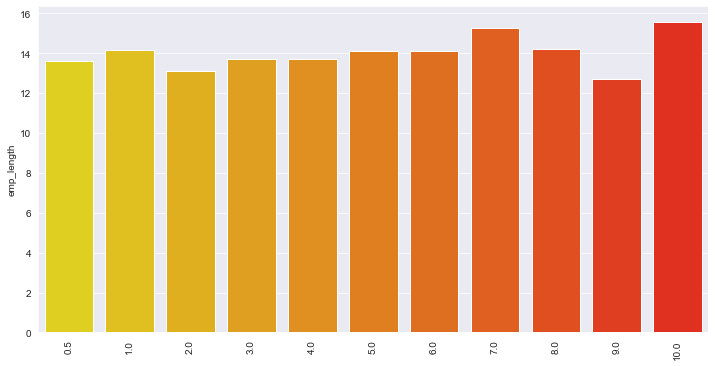

In [54]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sb.barplot(x=emp_default.index,y='emp_length',data=emp_default,ci=False,palette='autumn_r')

This conclude that the maximum risk is for 10+year and minimum risk is for 9 year loan.

### Which loanees should be avoided totally for giving a loan

In [45]:
risk=defaulter[defaulter['emp_length']==10]
risk.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,issue_month,issue_year
21,21000,36,12.42%,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,Charged Off,debt_consolidation,Debt Cleanup,FL,13.22,Dec,11
46,5000,36,8.90%,158.77,A,A5,STERIS Corporation,10.0,MORTGAGE,100000.0,Source Verified,Charged Off,debt_consolidation,Debt Consolidation for a better life,OH,16.33,Dec,11
64,10000,60,10.65%,215.69,B,B2,CEC ENTERTAINMENT INC,10.0,RENT,45996.0,Verified,Charged Off,debt_consolidation,Consolidation,OH,21.73,Dec,11
105,18825,60,16.77%,465.53,D,D2,Texas Health & Human Services Commission,10.0,RENT,38000.0,Verified,Charged Off,debt_consolidation,Coledon's Club Loan,TX,23.18,Dec,11
120,25000,60,13.49%,575.12,C,C1,Midnight,10.0,MORTGAGE,67000.0,Verified,Charged Off,credit_card,"Pay off credit card, refinance house",AK,14.15,Dec,11


In [46]:
risk_purpose=pd.DataFrame(data=(100*risk['purpose'].value_counts())/loan_df2['purpose'].value_counts())
risk_purpose.sort_values(by='purpose',ascending=False,inplace=True)
risk_purpose

,purpose
small_business,5.761024
renewable_energy,4.545455
house,4.451039
debt_consolidation,3.957983
vacation,3.846154
medical,3.791469
other,3.745109
home_improvement,3.600900
credit_card,2.541834
car,2.264685


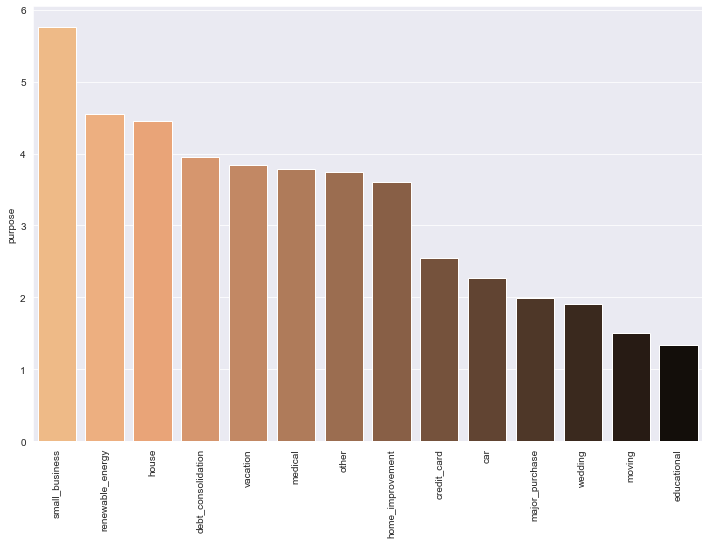

In [47]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sb.barplot(x=risk_purpose.index,y='purpose',data=risk_purpose,ci=False,palette='copper_r')

This implies that the people from small_business are most likely to be defaulters and should not be sanctioned easily for the loan or mkust be think thrice before sanctioning.

# Analysis for the best loanees.

In [48]:
loanee=loan_df2[loan_df2['emp_length']==9]
loanee.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,issue_month,issue_year
7,3000,36,18.64%,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Fully Paid,car,Car Downpayment,CA,5.35,Dec,11
26,15000,36,14.27%,514.64,C,C2,nyc transit,9.0,RENT,60000.0,Not Verified,Charged Off,debt_consolidation,consolidation,NY,15.22,Dec,11
51,25600,36,9.91%,824.96,B,B1,City of Santa Monica,9.0,RENT,110000.0,Verified,Fully Paid,credit_card,Credit card refinance loan,CA,15.71,Dec,11
88,12000,36,16.29%,423.61,D,D1,Phoenix Newspapers Inc.,9.0,RENT,88365.0,Verified,Fully Paid,debt_consolidation,loan payoff,AZ,16.85,Dec,11
115,8000,36,11.71%,264.61,B,B3,Wal-Mart,9.0,MORTGAGE,35000.0,Verified,Fully Paid,credit_card,Consolidation Loan,NV,9.70,Dec,11


In [49]:
loanee_purpose=pd.DataFrame(data=round((100*loanee['purpose'].value_counts())/loan_df2['purpose'].value_counts(),2))
loanee_purpose.sort_values(by='purpose',ascending=False,inplace=True)
loanee_purpose

,purpose
vacation,4.73
renewable_energy,4.55
moving,3.75
credit_card,3.73
home_improvement,3.53
debt_consolidation,3.41
car,3.26
other,3.13
small_business,2.77
educational,2.68


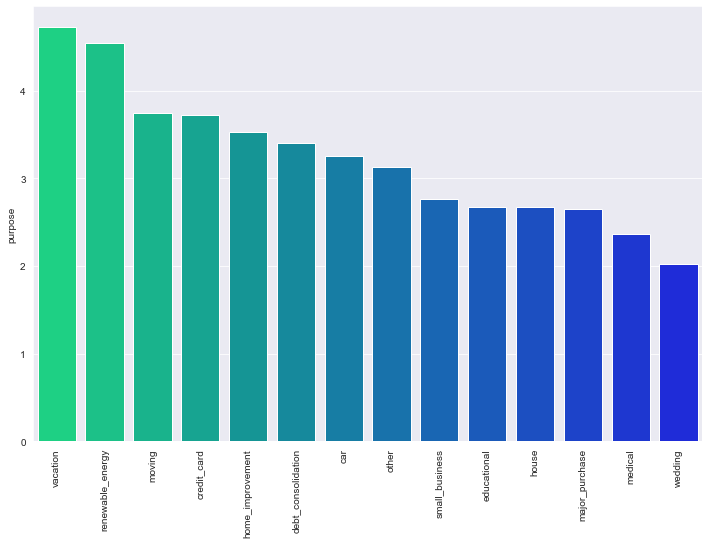

In [50]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sb.barplot(x=loanee_purpose.index,y='purpose',data=loanee_purpose,ci=False,palette='winter_r')


The loannes that comes under vacation are best suitable for loans.

### Distribution of loan that can be considered as best.

[Text(0.5, 0, 'Loan Amount'), Text(0.5, 1.0, 'Distribution of loan amount')]

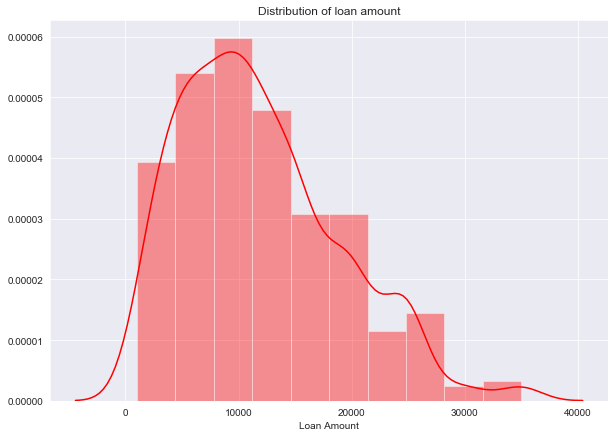

In [51]:
plt.figure(figsize=(10,7))
sb.set_style(style='darkgrid')
p=sb.distplot(loanee['loan_amnt'],bins=10,color='red')
p.set(xlabel='Loan Amount',title='Distribution of loan amount')

From above we can say that the amount distribution increases from initial to 1000 and then decreases gradually.

### Home Owneship best suitable for a loan of 9year loans.

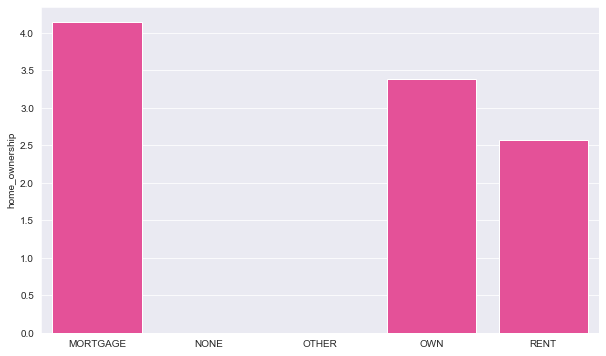

In [52]:
loanee_home=pd.DataFrame(data=round((100*loanee['home_ownership'].value_counts())/loan_df2['home_ownership'].value_counts(),2))
plt.figure(figsize=(10,6))
sb.barplot(x=loanee_home.index,y='home_ownership',data=loanee_home,ci=False,color='#fc3897')


## Conclusion

- People tend to go for 36 months loan rather than of 60 months tenure.
- There is a sudden increase in demand for lans in 2011.
- December is the month having highest sanctions of loan.
- The best tenure for issuing a loan for getting maximum profit is of 9 years that comes from Moratage group. 
- In case of 10 year loans, we observe that we have to bear comparatively more loss and hence should properly check the     category of the laonee. 
- The people from small_business are most likely to be defaulters and hence must be avoided for giving loans.